<a href="https://colab.research.google.com/github/Alwaleed-it/Phthon/blob/main/Top_Rated_Movies_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libarary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# **Read dataset**

In [ ]:
df = pd.read_csv('/content/Top_Rated_Movies.csv')

# **Data Discovery**

In [ ]:
print("="*50)
print("اكتشاف البيانات الأولي")
print("="*50)
print(f"عدد الصفوف: {df.shape[0]}, عدد الأعمدة: {df.shape[1]}")
print("\nعينة من البيانات:")
print(df.head(3))
print("\nمعلومات أنواع البيانات:")
print(df.info())
print("\nالإحصائيات الوصفية:")
print(df.describe(include='all'))
print("\nالقيم المفقودة:")
print(df.isnull().sum())

اكتشاف البيانات الأولي
عدد الصفوف: 964, عدد الأعمدة: 4

عينة من البيانات:
   popularity release_date                     title  vote_average
0     174.522    9/23/1994  The Shawshank Redemption         8.706
1     165.677    3/14/1972             The Godfather         8.690
2     174.522    9/23/1994  The Shawshank Redemption         8.706

معلومات أنواع البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    964 non-null    float64
 1   release_date  964 non-null    object 
 2   title         964 non-null    object 
 3   vote_average  964 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.3+ KB
None

الإحصائيات الوصفية:
         popularity release_date       title  vote_average
count    964.000000          964         964    964.000000
unique          NaN          910         958           NaN
top            

# **Preprocessing**

In [ ]:
print("\n" + "="*50)
print("تنظيف البيانات")
print("="*50)

# إزالة التكرارات
initial_count = df.shape[0]
df = df.drop_duplicates()
final_count = df.shape[0]
print(f"تم إزالة {initial_count - final_count} صف مكرر")

# تحويل تاريخ الإصدار
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# التعامل مع القيم المفقودة
df = df.dropna(subset=['release_date'])
print(f"القيم المفقودة بعد التنظيف:\n{df.isnull().sum()}")


تنظيف البيانات
تم إزالة 2 صف مكرر
القيم المفقودة بعد التنظيف:
popularity      0
release_date    0
title           0
vote_average    0
release_year    0
dtype: int64


<ipython-input-5-2172eb2b8e21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
<ipython-input-5-2172eb2b8e21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_date'].dt.year


# **Separate Numerical and Categorical**

In [ ]:
numerical = ['popularity', 'vote_average', 'release_year']
categorical = ['title']
target = 'vote_average'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("\n🔢 Numerical Features:", numerical_cols)
print("🔠 Categorical Features:", categorical_cols)




🔢 Numerical Features: ['popularity', 'vote_average', 'release_year']
🔠 Categorical Features: ['release_date', 'title']


# **Univariate Analysis**


التحليل الأحادي (Univariate Analysis)


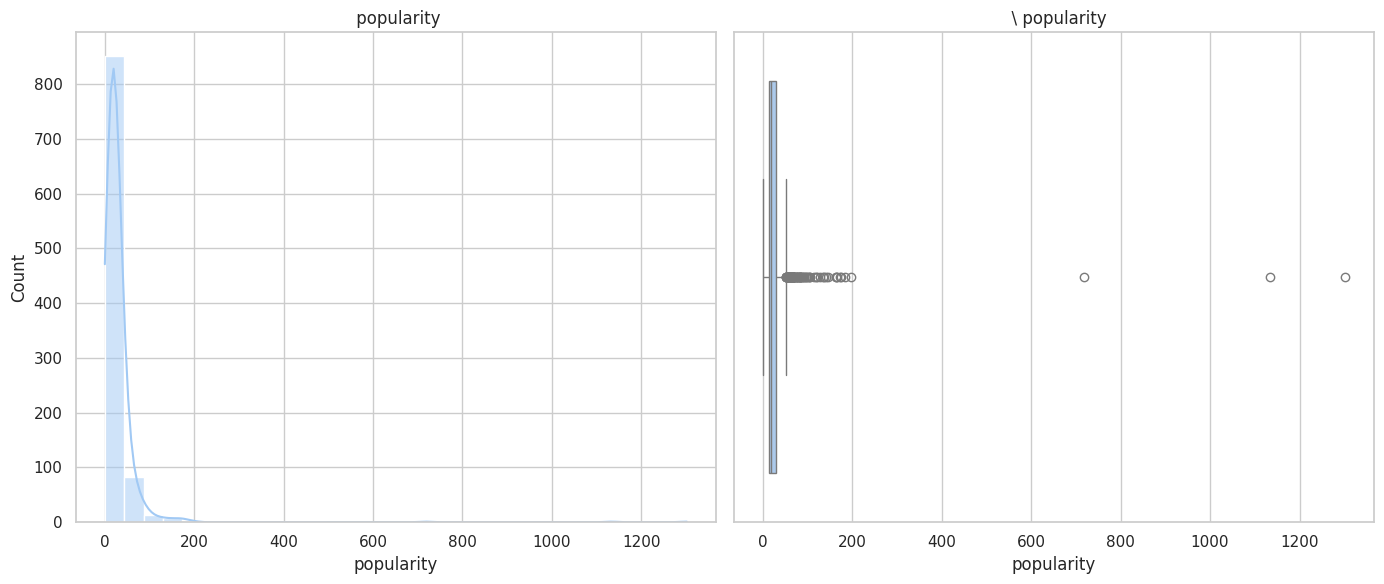

\ popularity:
count     962.000000
mean       29.495816
std        62.982802
min         0.579000
25%        14.527500
50%        19.272500
75%        29.280750
max      1301.432000
Name: popularity, dtype: float64
--------------------------------------------------


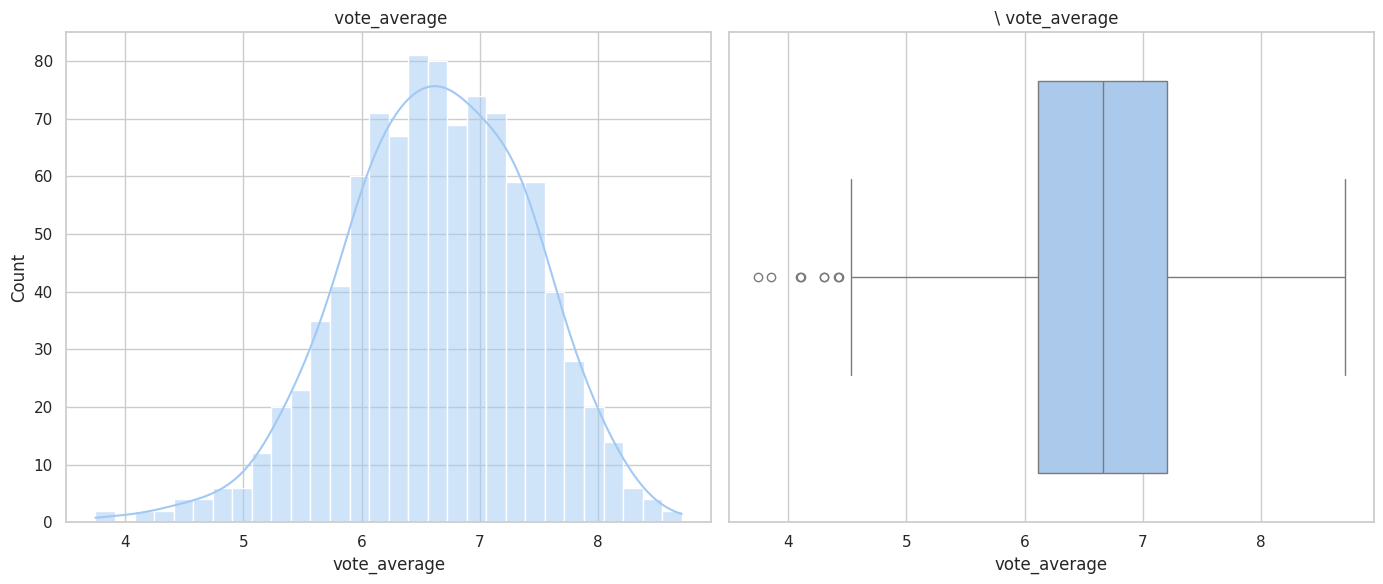

\ vote_average:
count    962.000000
mean       6.636925
std        0.783838
min        3.750000
25%        6.115250
50%        6.661000
75%        7.200000
max        8.706000
Name: vote_average, dtype: float64
--------------------------------------------------


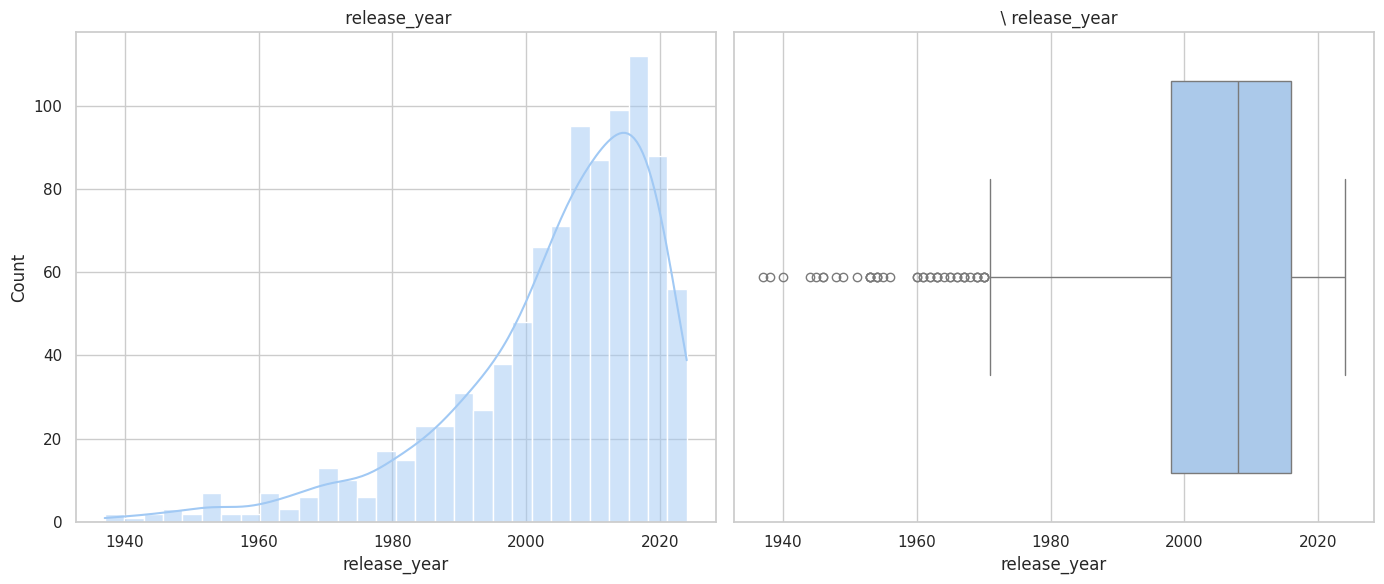

\ release_year:
count     962.000000
mean     2004.359667
std        15.742450
min      1937.000000
25%      1998.000000
50%      2008.000000
75%      2016.000000
max      2024.000000
Name: release_year, dtype: float64
--------------------------------------------------


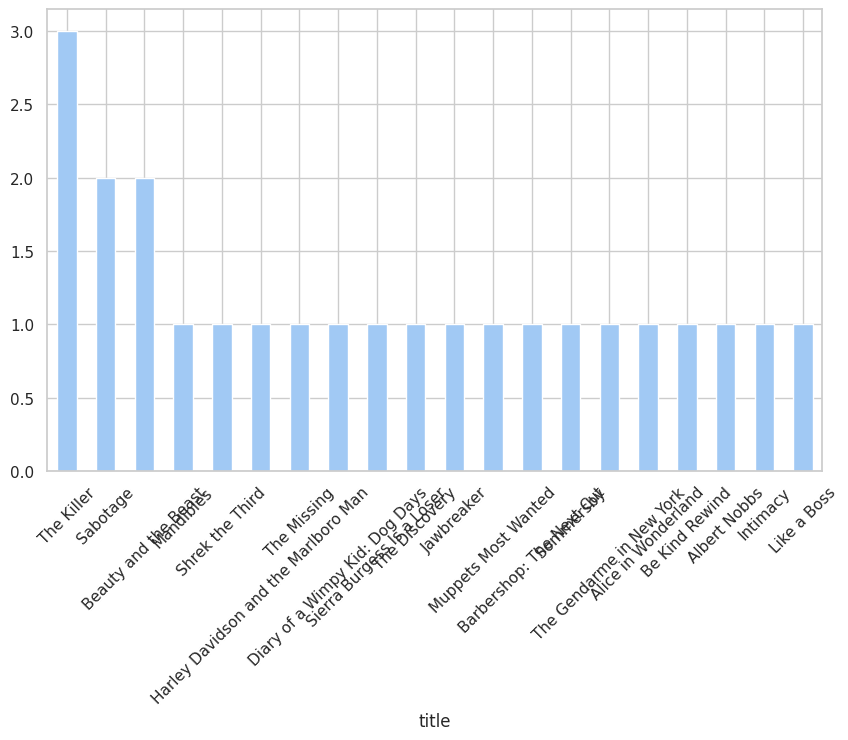

In [ ]:
print("\n" + "="*50)
print("التحليل الأحادي (Univariate Analysis)")
print("="*50)

# التحليل الأحادي للمتغيرات الرقمية
for col in numerical:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f' {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'  \ {col}')

    plt.tight_layout()
    plt.show()

    print(f"\ {col}:")
    print(df[col].describe())
    print("-"*50)

# التحليل الأحادي للمتغيرات الفئوية
for col in categorical:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().head(20).plot(kind='bar')

    plt.xticks(rotation=45)
    plt.show()

# **Bivariate Analysis**


التحليل الثنائي (Bivariate Analysis)


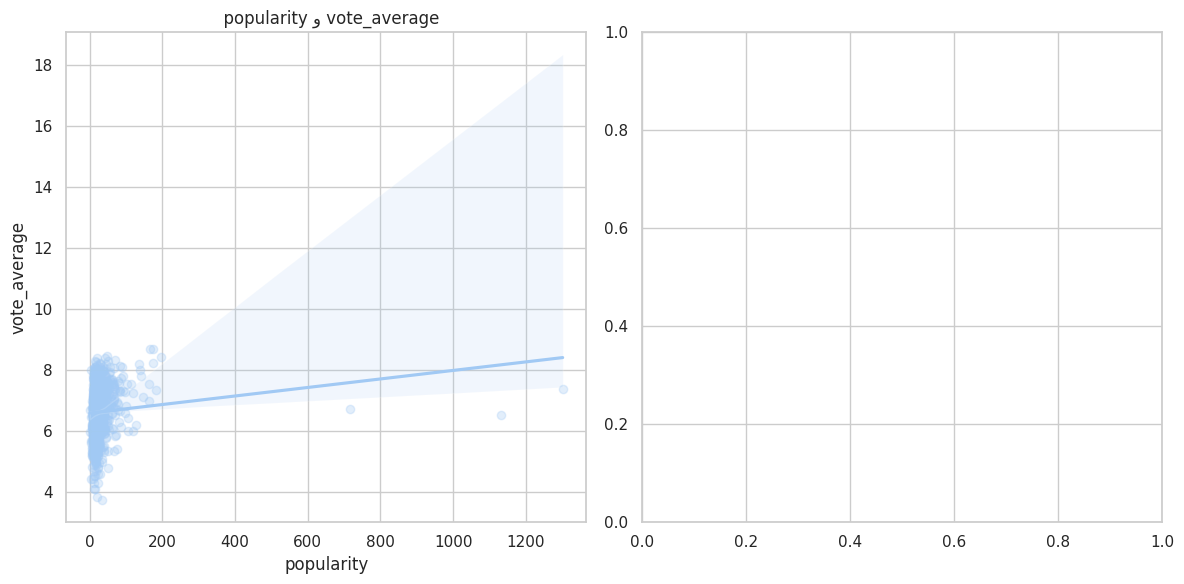

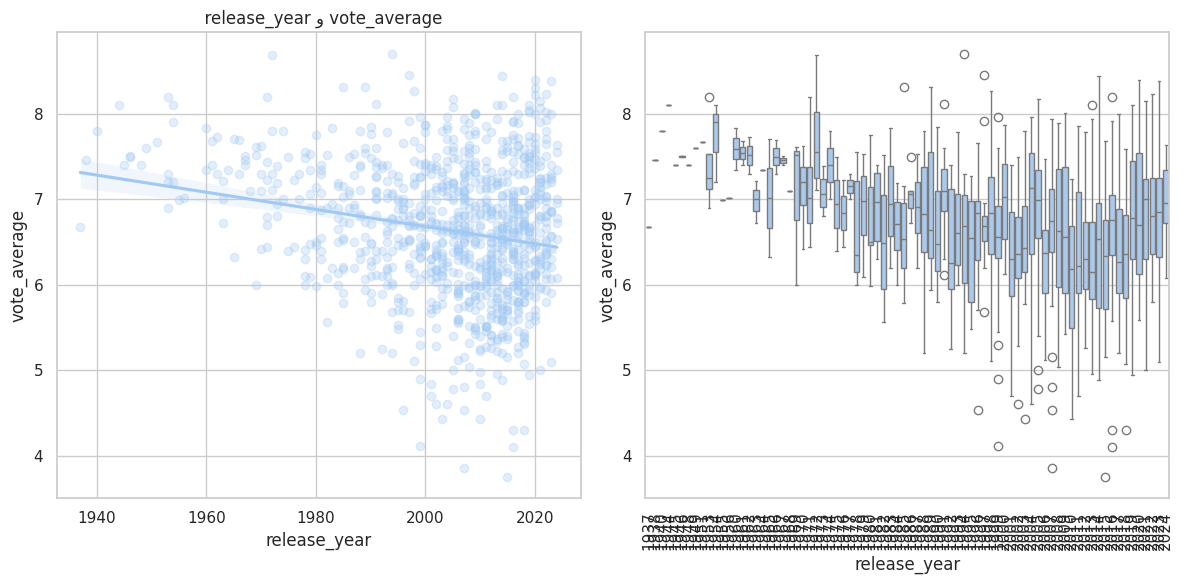

In [ ]:
print("\n" + "="*50)
print("التحليل الثنائي (Bivariate Analysis)")
print("="*50)

# العلاقة بين المتغيرات الرقمية والمتغير الهدف
for col in numerical:
    if col != target:
        plt.figure(figsize=(12, 6))

        # مخطط الانتشار مع خط الانحدار
        plt.subplot(1, 2, 1)
        sns.regplot(x=col, y=target, data=df, scatter_kws={'alpha':0.3})
        plt.title(f'  {col} و {target}')

        # مخطط مربعات حسب السنة
        plt.subplot(1, 2, 2)
        if col == 'release_year':
            sns.boxplot(x=df['release_year'].astype('int'), y=target, data=df)
            plt.xticks(rotation=90)


        plt.tight_layout()
        plt.show()

# **Multivariate Analysis**


التحليل المتعدد (Multivariate Analysis)


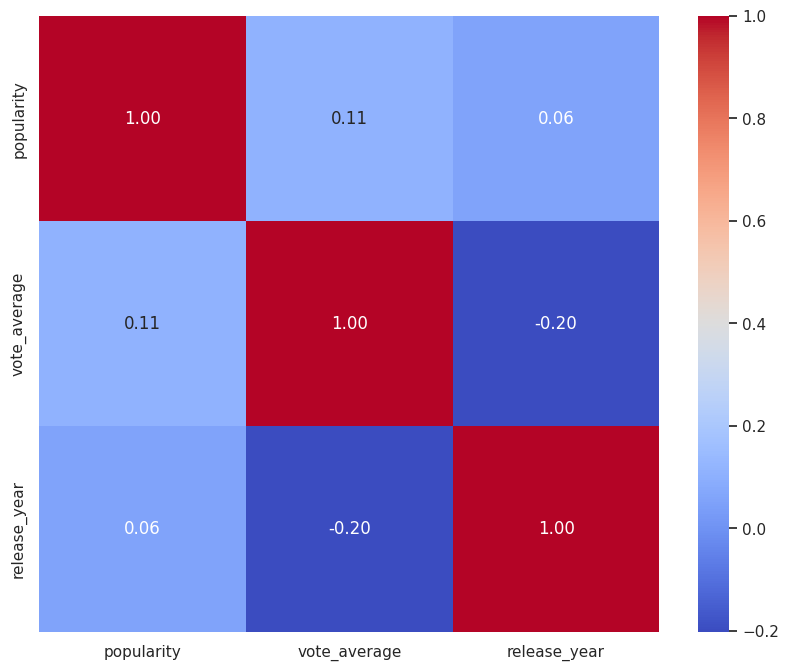

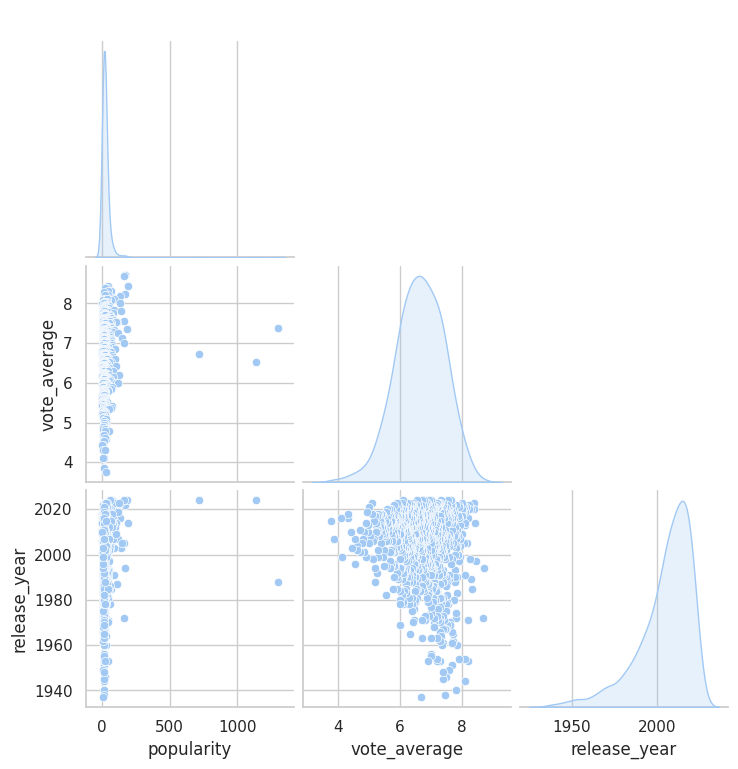

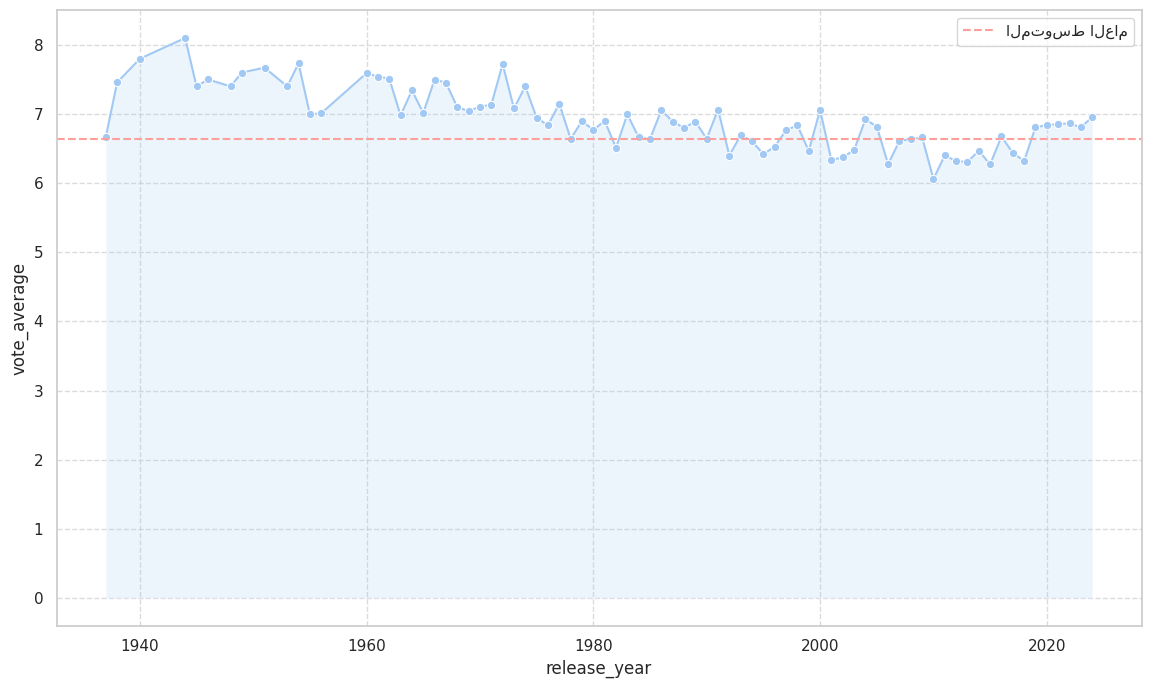

In [ ]:
print("\n" + "="*50)
print("التحليل المتعدد (Multivariate Analysis)")
print("="*50)

# مصفوفة الارتباط
corr = df[numerical].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

# مخطط الانتشار المزدوج
sns.pairplot(df[numerical], diag_kind='kde', corner=True)
plt.suptitle('  ', y=1.02)
plt.show()

# تحليل التقييمات حسب السنوات
plt.figure(figsize=(14, 8))
yearly_avg = df.groupby('release_year')[target].mean().reset_index()
sns.lineplot(x='release_year', y=target, data=yearly_avg, marker='o')
plt.axhline(y=df[target].mean(), color='r', linestyle='--', label='المتوسط العام')
plt.fill_between(yearly_avg['release_year'], yearly_avg[target], alpha=0.2)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


تحليل إضافي
أفضل 10 أفلام تقييماً:
                           title  release_year  vote_average  popularity
0       The Shawshank Redemption          1994         8.706     174.522
1                  The Godfather          1972         8.690     165.677
4              Life Is Beautiful          1997         8.449      47.916
5                   Interstellar          2014         8.440     197.569
7    Gabriel's Inferno: Part III          2020         8.400      21.390
6   TAYLOR SWIFT | THE ERAS TOUR          2023         8.388      42.629
8             Back to the Future          1985         8.318      69.527
9             Dead Poets Society          1989         8.312      49.507
11                         Given          2020         8.300      14.670
10            The Legend of 1900          1998         8.266      18.452


<ipython-input-17-190d264d5276>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='title', data=top_popular, palette='viridis')


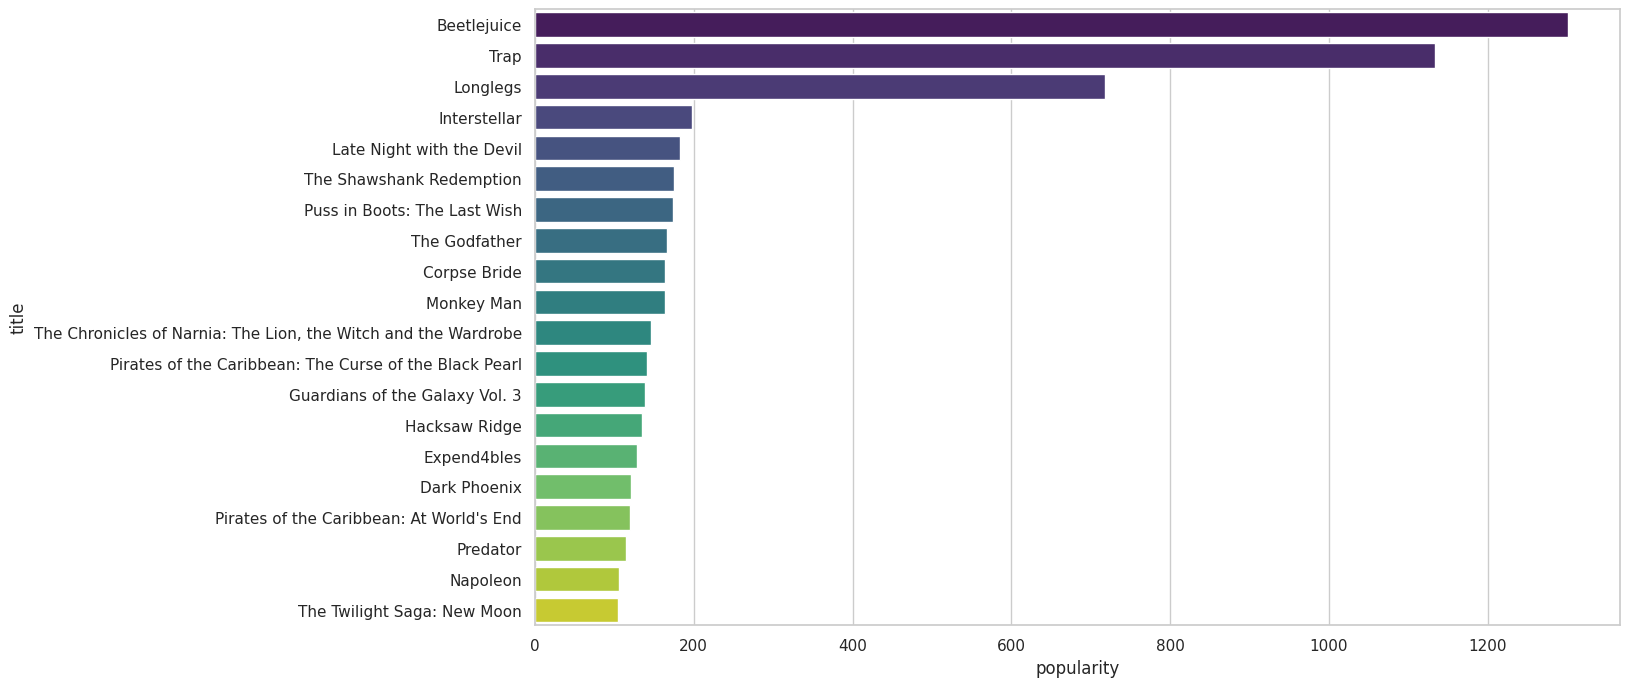

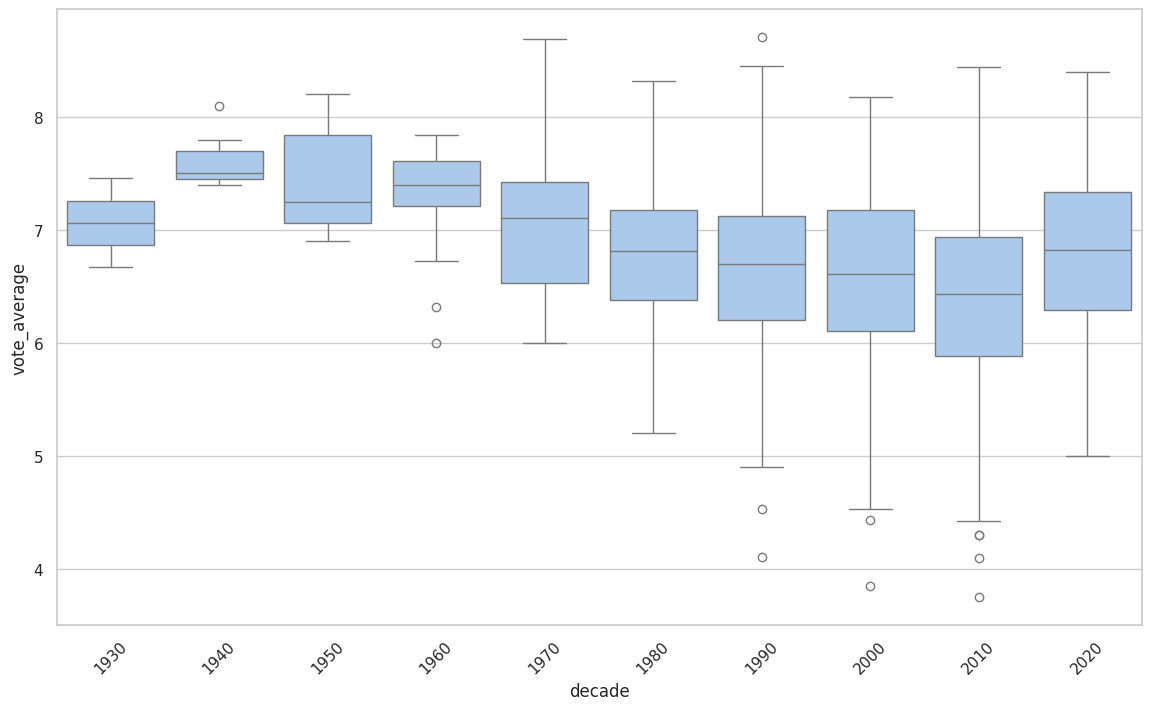

In [ ]:
print("\n" + "="*50)
print("تحليل إضافي")
print("="*50)

# أفضل 10 أفلام تقييماً
top_movies = df.nlargest(10, 'vote_average')[['title', 'release_year', 'vote_average', 'popularity']]
print("أفضل 10 أفلام تقييماً:")
print(top_movies)

# الأفلام الأكثر شعبية
plt.figure(figsize=(14, 8))
top_popular = df.nlargest(20, 'popularity')
sns.barplot(x='popularity', y='title', data=top_popular, palette='viridis')

plt.show()

# توزيع التقييمات حسب فترات زمنية
df['decade'] = (df['release_year'] // 10) * 10
plt.figure(figsize=(14, 8))
sns.boxplot(x='decade', y='vote_average', data=df)

plt.xticks(rotation=45)
plt.show()